In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_df = pd.read_csv('data/city_data.csv')
ride_df = pd.read_csv('data/ride_data.csv')

In [2]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [6]:
# combine the data into a single dataset using pandas merge
merged_df = pd.merge(ride_df, city_df, on='city', how='left')

In [7]:
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# output to csv
# merged_df.to_csv("name.csv")

In [9]:
# filter data to split up types
merged_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# df[df["column"] == "condition"]; df[condition]
urban = merged_df[merged_df["type"] == "Urban"]
suburban = merged_df[merged_df["type"] == "Suburban"]
rural = merged_df[merged_df["type"] == "Rural"]

In [11]:
urban_avg_fare = urban.groupby("city").mean()["fare"]
urban_driver_count = urban.groupby("city").mean()["driver_count"]
urban_ride_count = urban.groupby("city").count()["ride_id"]

suburban_avg_fare = suburban.groupby("city").mean()["fare"]
suburban_driver_count = suburban.groupby("city").mean()["driver_count"]
suburban_ride_count = suburban.groupby("city").count()["ride_id"]

rural_avg_fare = rural.groupby("city").mean()["fare"]
rural_driver_count = rural.groupby("city").mean()["driver_count"]
rural_ride_count = rural.groupby("city").count()["ride_id"]

## Bubble Plot of Ride Sharing Data

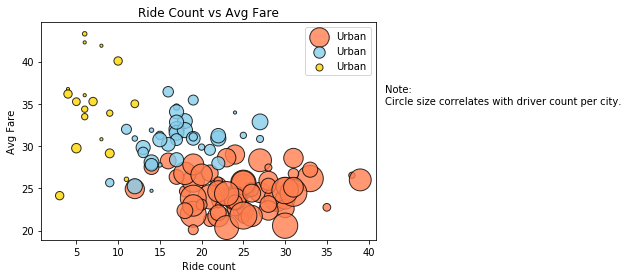

In [12]:
# Obtain the x and y coordinates for each of the three city types

plt.scatter(x = urban_ride_count, y = urban_avg_fare, 
            s = 10 * urban_driver_count, c='coral', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1, label="Urban")

plt.scatter(x = suburban_ride_count, y = suburban_avg_fare, 
            s = 10 * suburban_driver_count, c='skyblue', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1, label="Urban")

plt.scatter(x = rural_ride_count, y = rural_avg_fare, 
            s = 10 * rural_driver_count, c='gold', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1, label="Urban")

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("Ride Count vs Avg Fare")
plt.xlabel("Ride count")
plt.ylabel("Avg Fare")

# Create a legend
plt.legend(loc='best')

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Show plot
#plt.show()

# Save Figure
plt.savefig('fig1.png')

## Total Fares by City Type

In [13]:
# group and sum city and fare types to calculate type percents
total_fares_pie = merged_df.groupby(["type"])["fare"].sum()
total_fares_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
# determine index for pie labels
total_fares_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

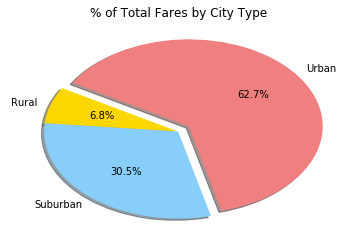

In [15]:
# set the colors of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# explode one third of the pie chart
explode = (0,0, 0.1)

# build pie chart
plt.pie(total_fares_pie, labels = total_fares_pie.index, autopct = "%1.1f%%",
        colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title("% of Total Fares by City Type")

# Show Figure
#plt.show()

# Save Figure
plt.savefig('fig2.png')

## Total Rides by City Type

In [16]:
# Calculate Ride Percents
total_rides_pie = merged_df.groupby(["type"])["ride_id"].count()
total_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

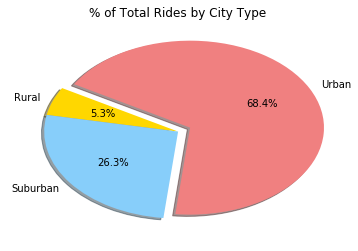

In [17]:
# determine index for pie labels
total_rides_pie.index

# set the colors of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# explode one third of the pie chart
explode = (0,0, 0.1)

# Build Pie Chart
plt.pie(total_rides_pie, labels = total_rides_pie.index, autopct = "%1.1f%%",
        colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title("% of Total Rides by City Type")

# Show Figure
#plt.show()

# Save Figure
plt.savefig('fig3.png')

## Total Drivers by City Type

In [18]:
# Calculate Driver Percents
total_drivers_pie = city_df.groupby(["type"])["driver_count"].sum()
total_drivers_pie

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

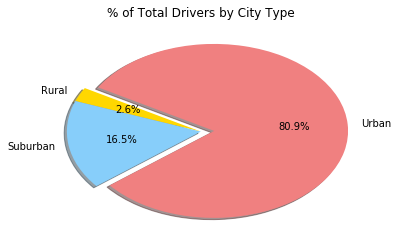

In [19]:
# determine index for pie labels
total_drivers_pie.index

# set colours
colors = ["gold", "lightskyblue", "lightcoral"]

# explode one third of the pie chart
explode = (0,0, 0.1)

# Build Pie Chart
plt.pie(total_drivers_pie, labels = total_drivers_pie.index, autopct = "%1.1f%%",
        colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title("% of Total Drivers by City Type")

# Show Figure
#plt.show()

# Save Figure
plt.savefig('fig4.png')

In [ ]:
# The results of this data analysis shows the following insights: 

# Within urban environments there is greater reliance on drivers than in rural environments, compared. 
# With this we see a positive correlation between drivers and rides; with increased drivers in urban environments, 
# there are conversely increased rides, as compared to fewer drivers and less rides in rural environments. 

# With urban vs. rural environments we also see a correlation between the drivers/rides data and fares.
# In urban environments, as the number of drivers and rides is increased we see a decrease in the cost of fares. 
# This can be attributed to the principle of supply and demand, wherein prices (fares) go down with increased 
# supply (drivers).

# Various factors may contribute to this scenario, including the fact that in urban environments more people rely on 
# single-purpose vehicles for their transportation needs (ie. fare-based driver services vs personal car ownership). 
# Also urban planning principles that designed the suburbs around the car, as well as rural environments where 
# destinations are spaced few and far between, mean that more people in suburban and rural environments depend on 
# personal car ownership for their primary means of transportation. 

# Conversely, the increased cost of living combined with the availability of multiple forms of transportation in urban
# environments means that more people people living in urban environments typically have more transportation options 
# than those in rural areas, and therefore do not always own their own vehicle. This, combined with the sheer 
# population differential thus also accounts for the increased number of urban drivers and fares. 